In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('finshots_enriched_simple.csv')

In [3]:
df.head(10)

,url,date,theme,title,content_simple,word_count,reading_time_min,flesch_simple,sentiment_simple,top_keywords,entities_simple
0,https://finshots.in/top-articles,2025-09-23,7 min read,Top Articles - Finshots,"Macro The $100,000 H1-B visa shock A story tha...",24,0.12,99.48,0.000,"macro, visa, shock, story, tries, understand, ...","Finshots Special, Top Articles, Capital Market..."
1,https://finshots.in/privacy-policy-2,2019-08-14,NaN,Privacy Policy,Privacy Policy Last modification date: 14th Au...,961,4.80,43.81,1.000,"information, use, privacy, service, site, may,...","Privacy Policy, Tacterial Consulting Private L..."
2,https://finshots.in/grievance-redressal,2021-05-25,NaN,Grievance Redressal,Grievance Redressal Last modification date: 25...,228,1.14,28.37,0.000,"grievance, code, ethics, content, redressal, l...","Grievance Redressal, Tacterial Consulting Priv..."
3,https://finshots.in/corrections-policy-new,2020-07-23,NaN,Corrections Policy,Corrections Policy Our Corrections Policy Fins...,249,1.25,39.26,0.000,"corrections, errors, content, finshots, made, ...","Corrections Policy, Lokesh Gurram, Our Correct..."
4,https://finshots.in/fact-checking-policy,2020-07-23,NaN,Fact-Checking Policy,Fact-Checking Policy We are committed to provi...,176,0.88,39.57,0.000,"information, readers, fact, checking, accurate...","Checking Policy, Lokesh Gurram, Main Menu, Fin..."
5,https://finshots.in/ethics-policy,2020-07-23,NaN,Ethics Policy,Ethics Policy We are committed to maintaining ...,156,0.78,57.24,0.000,"work, ethics, content, others, creators, media...","Ethics Policy, Lokesh Gurram, Main Menu, Finsh..."
6,https://finshots.in/terms-of-service,2019-08-14,NaN,Terms of Service,Terms of Service Tacterial Consulting Private ...,634,3.17,36.72,0.000,"any, materials, finception, website, site, ter...","Tacterial Consulting Private Ltd, Bhanu Gurram..."
7,https://finshots.in/archive/the-wakefit-innova...,2025-12-08,Capital Markets,The Wakefit IPO explained,8 December 2025 • Capital Markets The Wakefit ...,1501,7.50,60.23,0.455,"wakefit, crore, company, stores, ipo, fy25, re...","The Wakefit, Wakefit Innovations, Capital Mark..."
8,https://finshots.in/archive/classic-legends-wi...,2025-12-07,Sunny Side Up,"🍳Classic Legends win back Yezdi, and more...",7 December 2025 • Sunny Side Up 🍳Classic Legen...,1245,6.22,58.59,0.778,"yezdi, like, into, trademark, what, name, comp...","Classic Legends, Sunny Side Up, Ideal Jawa, Bo..."
9,https://finshots.in/archive/rupees-slide-the-m...,2025-12-06,Weekly,"Rupee's slide, the Meesho IPO, the Airbus scar...","6 December 2025 • Weekly Rupee's slide, the Me...",1208,6.04,61.42,0.167,"how, week, out, weekly, finshots, here, quiz, ipo","Aerial Innovations, The Airbus, Finshots Weekl..."


In [4]:
df.isnull().sum()

url                 0
date                0
theme               6
title               0
content_simple      0
word_count          0
reading_time_min    0
flesch_simple       0
sentiment_simple    0
top_keywords        0
entities_simple     0
dtype: int64

In [5]:
df = df.dropna(subset=['theme'])

In [6]:
df.head(10)

,url,date,theme,title,content_simple,word_count,reading_time_min,flesch_simple,sentiment_simple,top_keywords,entities_simple
0,https://finshots.in/top-articles,2025-09-23,7 min read,Top Articles - Finshots,"Macro The $100,000 H1-B visa shock A story tha...",24,0.12,99.48,0.000,"macro, visa, shock, story, tries, understand, ...","Finshots Special, Top Articles, Capital Market..."
7,https://finshots.in/archive/the-wakefit-innova...,2025-12-08,Capital Markets,The Wakefit IPO explained,8 December 2025 • Capital Markets The Wakefit ...,1501,7.50,60.23,0.455,"wakefit, crore, company, stores, ipo, fy25, re...","The Wakefit, Wakefit Innovations, Capital Mark..."
8,https://finshots.in/archive/classic-legends-wi...,2025-12-07,Sunny Side Up,"🍳Classic Legends win back Yezdi, and more...",7 December 2025 • Sunny Side Up 🍳Classic Legen...,1245,6.22,58.59,0.778,"yezdi, like, into, trademark, what, name, comp...","Classic Legends, Sunny Side Up, Ideal Jawa, Bo..."
9,https://finshots.in/archive/rupees-slide-the-m...,2025-12-06,Weekly,"Rupee's slide, the Meesho IPO, the Airbus scar...","6 December 2025 • Weekly Rupee's slide, the Me...",1208,6.04,61.42,0.167,"how, week, out, weekly, finshots, here, quiz, ipo","Aerial Innovations, The Airbus, Finshots Weekl..."
10,https://finshots.in/markets/is-the-rupee-too-w...,2025-12-05,Markets,Is the rupee too weak or the dollar too strong,5 December 2025 • Markets Is the rupee too wea...,1361,6.80,62.37,0.217,"rupee, india, currency, dollar, economy, infla...","But India, Classic Legends, Finshots Main, The..."
11,https://finshots.in/archive/droneacharya-aeria...,2025-12-02,Capital Markets,DroneAcharya Aerial Innovations has landed its...,2 December 2025 • Capital Markets DroneAcharya...,1768,8.84,55.47,0.280,"investors, ipo, company, droneacharya, when, c...","Aerial Innovations, Capital Markets, Classic L..."
12,https://finshots.in/archive/the-economics-of-p...,2025-12-05,Business,The economics of Pantone and its colours,5 December 2025 • Business The economics of Pa...,1731,8.65,59.28,0.429,"pantone, colour, colours, shade, ink, year, ye...","Classic Legends, Finshots Main, The Wakefit, M..."
13,https://finshots.in/archive/why-indias-competi...,2025-12-04,Policy,Why India’s Competition law has Apple on edge,4 December 2025 • Policy Why India’s Competiti...,1599,8.00,59.59,0.000,"india, penalties, apple, penalty, companies, t...","Why India, Competition Commission, Why Apple, ..."
14,https://finshots.in/archive/the-meesho-ipo-exp...,2025-12-03,Capital Markets,The Meesho IPO explained,3 December 2025 • Capital Markets The Meesho I...,1490,7.45,51.33,0.100,"meesho, sellers, crore, company, revenue, ipo,...","The Meesho, Capital Markets, Classic Legends, ..."
15,https://finshots.in/archive/yezdis-new-year-re...,2023-01-08,Sunny Side Up,"Sunny Side Up 🍳: Yezdi, New year’s resolutions...",8 January 2023 • Sunny Side Up Sunny Side Up 🍳...,1467,7.33,72.44,0.143,"yezdi, year, people, trademark, want, like, go...","Sunny Side Up, Classic Legends, Ideal Jawa, Sh..."


In [7]:
df = df.drop([0])

In [8]:
df.head()

,url,date,theme,title,content_simple,word_count,reading_time_min,flesch_simple,sentiment_simple,top_keywords,entities_simple
7,https://finshots.in/archive/the-wakefit-innova...,2025-12-08,Capital Markets,The Wakefit IPO explained,8 December 2025 • Capital Markets The Wakefit ...,1501,7.50,60.23,0.455,"wakefit, crore, company, stores, ipo, fy25, re...","The Wakefit, Wakefit Innovations, Capital Mark..."
8,https://finshots.in/archive/classic-legends-wi...,2025-12-07,Sunny Side Up,"🍳Classic Legends win back Yezdi, and more...",7 December 2025 • Sunny Side Up 🍳Classic Legen...,1245,6.22,58.59,0.778,"yezdi, like, into, trademark, what, name, comp...","Classic Legends, Sunny Side Up, Ideal Jawa, Bo..."
9,https://finshots.in/archive/rupees-slide-the-m...,2025-12-06,Weekly,"Rupee's slide, the Meesho IPO, the Airbus scar...","6 December 2025 • Weekly Rupee's slide, the Me...",1208,6.04,61.42,0.167,"how, week, out, weekly, finshots, here, quiz, ipo","Aerial Innovations, The Airbus, Finshots Weekl..."
10,https://finshots.in/markets/is-the-rupee-too-w...,2025-12-05,Markets,Is the rupee too weak or the dollar too strong,5 December 2025 • Markets Is the rupee too wea...,1361,6.80,62.37,0.217,"rupee, india, currency, dollar, economy, infla...","But India, Classic Legends, Finshots Main, The..."
11,https://finshots.in/archive/droneacharya-aeria...,2025-12-02,Capital Markets,DroneAcharya Aerial Innovations has landed its...,2 December 2025 • Capital Markets DroneAcharya...,1768,8.84,55.47,0.280,"investors, ipo, company, droneacharya, when, c...","Aerial Innovations, Capital Markets, Classic L..."


In [9]:
df = df.reset_index(drop=True)

In [10]:
df.head()

,url,date,theme,title,content_simple,word_count,reading_time_min,flesch_simple,sentiment_simple,top_keywords,entities_simple
0,https://finshots.in/archive/the-wakefit-innova...,2025-12-08,Capital Markets,The Wakefit IPO explained,8 December 2025 • Capital Markets The Wakefit ...,1501,7.50,60.23,0.455,"wakefit, crore, company, stores, ipo, fy25, re...","The Wakefit, Wakefit Innovations, Capital Mark..."
1,https://finshots.in/archive/classic-legends-wi...,2025-12-07,Sunny Side Up,"🍳Classic Legends win back Yezdi, and more...",7 December 2025 • Sunny Side Up 🍳Classic Legen...,1245,6.22,58.59,0.778,"yezdi, like, into, trademark, what, name, comp...","Classic Legends, Sunny Side Up, Ideal Jawa, Bo..."
2,https://finshots.in/archive/rupees-slide-the-m...,2025-12-06,Weekly,"Rupee's slide, the Meesho IPO, the Airbus scar...","6 December 2025 • Weekly Rupee's slide, the Me...",1208,6.04,61.42,0.167,"how, week, out, weekly, finshots, here, quiz, ipo","Aerial Innovations, The Airbus, Finshots Weekl..."
3,https://finshots.in/markets/is-the-rupee-too-w...,2025-12-05,Markets,Is the rupee too weak or the dollar too strong,5 December 2025 • Markets Is the rupee too wea...,1361,6.80,62.37,0.217,"rupee, india, currency, dollar, economy, infla...","But India, Classic Legends, Finshots Main, The..."
4,https://finshots.in/archive/droneacharya-aeria...,2025-12-02,Capital Markets,DroneAcharya Aerial Innovations has landed its...,2 December 2025 • Capital Markets DroneAcharya...,1768,8.84,55.47,0.280,"investors, ipo, company, droneacharya, when, c...","Aerial Innovations, Capital Markets, Classic L..."


In [11]:
df.shape

(143, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               143 non-null    object 
 1   date              143 non-null    object 
 2   theme             143 non-null    object 
 3   title             143 non-null    object 
 4   content_simple    143 non-null    object 
 5   word_count        143 non-null    int64  
 6   reading_time_min  143 non-null    float64
 7   flesch_simple     143 non-null    float64
 8   sentiment_simple  143 non-null    float64
 9   top_keywords      143 non-null    object 
 10  entities_simple   143 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 12.4+ KB


In [13]:
df['date'].min()

'2023-01-08'

In [14]:
df['date'].max()

'2025-12-08'

In [15]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [16]:
df.head()

,url,date,theme,title,content_simple,word_count,reading_time_min,flesch_simple,sentiment_simple,top_keywords,entities_simple,year,month,day
0,https://finshots.in/archive/the-wakefit-innova...,2025-12-08,Capital Markets,The Wakefit IPO explained,8 December 2025 • Capital Markets The Wakefit ...,1501,7.50,60.23,0.455,"wakefit, crore, company, stores, ipo, fy25, re...","The Wakefit, Wakefit Innovations, Capital Mark...",2025,12,8
1,https://finshots.in/archive/classic-legends-wi...,2025-12-07,Sunny Side Up,"🍳Classic Legends win back Yezdi, and more...",7 December 2025 • Sunny Side Up 🍳Classic Legen...,1245,6.22,58.59,0.778,"yezdi, like, into, trademark, what, name, comp...","Classic Legends, Sunny Side Up, Ideal Jawa, Bo...",2025,12,7
2,https://finshots.in/archive/rupees-slide-the-m...,2025-12-06,Weekly,"Rupee's slide, the Meesho IPO, the Airbus scar...","6 December 2025 • Weekly Rupee's slide, the Me...",1208,6.04,61.42,0.167,"how, week, out, weekly, finshots, here, quiz, ipo","Aerial Innovations, The Airbus, Finshots Weekl...",2025,12,6
3,https://finshots.in/markets/is-the-rupee-too-w...,2025-12-05,Markets,Is the rupee too weak or the dollar too strong,5 December 2025 • Markets Is the rupee too wea...,1361,6.80,62.37,0.217,"rupee, india, currency, dollar, economy, infla...","But India, Classic Legends, Finshots Main, The...",2025,12,5
4,https://finshots.in/archive/droneacharya-aeria...,2025-12-02,Capital Markets,DroneAcharya Aerial Innovations has landed its...,2 December 2025 • Capital Markets DroneAcharya...,1768,8.84,55.47,0.280,"investors, ipo, company, droneacharya, when, c...","Aerial Innovations, Capital Markets, Classic L...",2025,12,2


### Number of articles per year

In [17]:
df.groupby('year').size()

year
2023      1
2024      1
2025    141
dtype: int64

### Articles per month, per year

In [18]:
df.groupby(['year', 'month']).size().reset_index(name='count')

,year,month,count
0,2023,1,1
1,2024,12,1
2,2025,7,3
3,2025,8,9
4,2025,9,38
5,2025,10,44
6,2025,11,38
7,2025,12,9


### Most common themes

In [19]:
df['theme'].value_counts()

theme
infographic            30
Business               23
Capital Markets        21
Sunny Side Up          16
Weekly                 14
Markets                13
Policy                 12
Economy                 6
Macro                   6
A bit of Everything     2
Name: count, dtype: int64

### Themes over time

In [20]:
theme_trend = df.groupby(['year', 'theme']).size().reset_index(name='count')
theme_trend

,year,theme,count
0,2023,Sunny Side Up,1
1,2024,Capital Markets,1
2,2025,A bit of Everything,2
3,2025,Business,23
4,2025,Capital Markets,20
5,2025,Economy,6
6,2025,Macro,6
7,2025,Markets,13
8,2025,Policy,12
9,2025,Sunny Side Up,15


### Which day of the week has most articles?

In [21]:
df['weekday'] = df['date'].dt.day_name()
df['weekday'].value_counts()

weekday
Friday       34
Tuesday      20
Monday       19
Sunday       19
Saturday     17
Thursday     17
Wednesday    17
Name: count, dtype: int64

### What type of themes appear on which weekdays?

In [22]:
df.groupby(['weekday', 'theme']).size().reset_index(name='count')

,weekday,theme,count
0,Friday,A bit of Everything,1
1,Friday,Business,5
2,Friday,Capital Markets,4
3,Friday,Economy,2
4,Friday,Macro,2
5,Friday,Markets,13
6,Friday,infographic,7
7,Monday,A bit of Everything,1
8,Monday,Business,5
9,Monday,Capital Markets,4


## Visuals

### Articles published per month

<Axes: xlabel='date_period'>

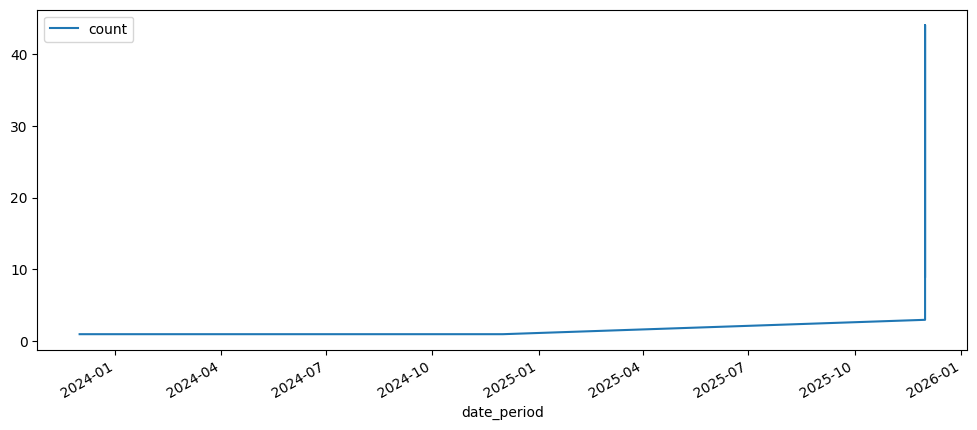

In [23]:
monthly = df.groupby(['year','month']).size().reset_index(name='count')
monthly['date_period'] = pd.to_datetime(monthly['year'].astype(str) + '-' + df['month'].astype(str) + '-01')

monthly.sort_values('date_period', inplace=True)

monthly.plot(x='date_period', y='count', kind='line', figsize=(12,5))

### Articles by Theme

<Axes: xlabel='theme'>

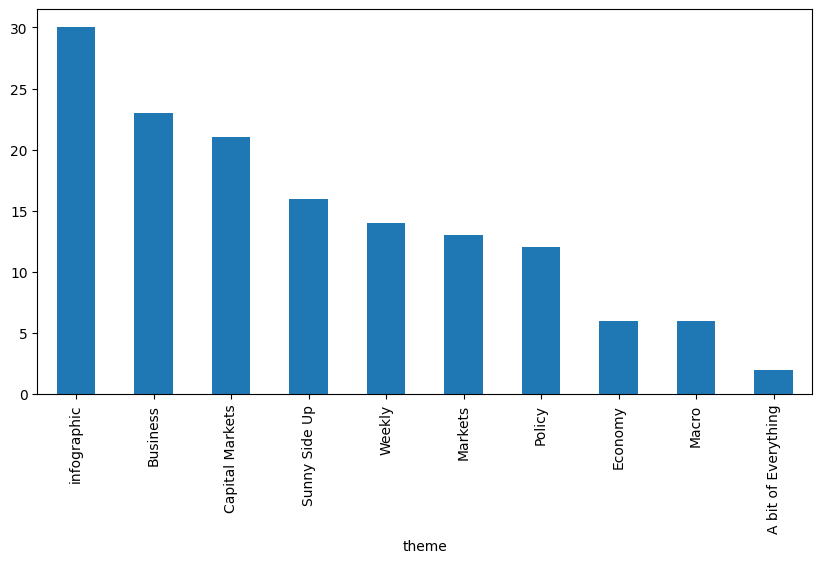

In [24]:
df['theme'].value_counts().plot(kind='bar', figsize=(10,5))

### Publishing frequency

<Axes: xlabel='day', ylabel='month'>

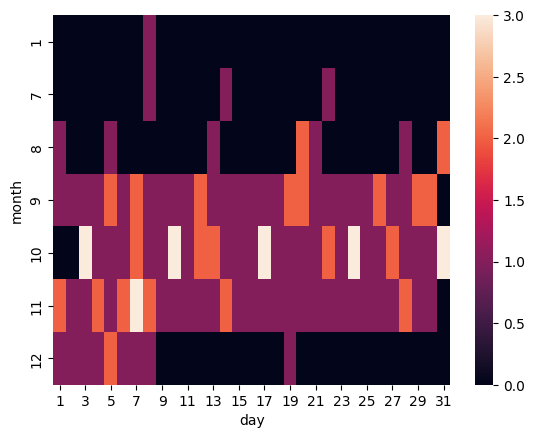

In [25]:
heat = df.pivot_table(index='month', columns='day', aggfunc='size', fill_value=0)
sns.heatmap(heat)

### Weekday analysis

<Axes: xlabel='weekday'>

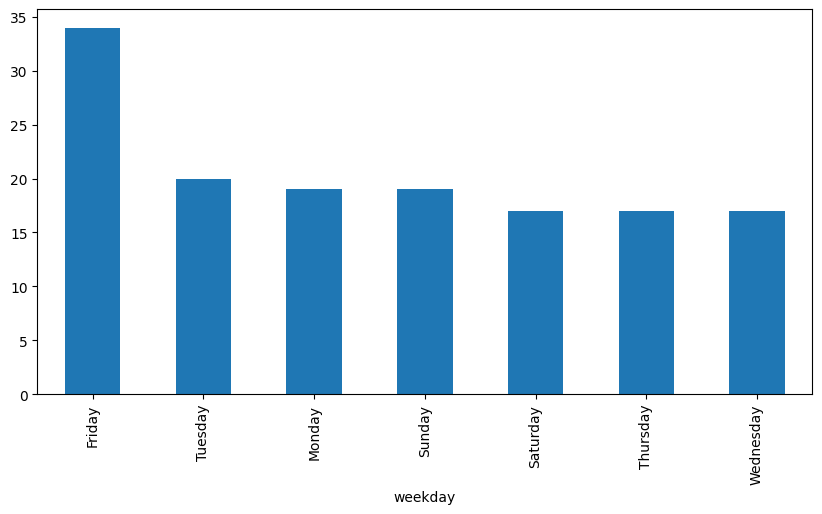

In [26]:
df['weekday'] = df['date'].dt.day_name()
df['weekday'].value_counts().plot(kind='bar', figsize=(10,5))

### Title length vs frequency

<Axes: ylabel='Frequency'>

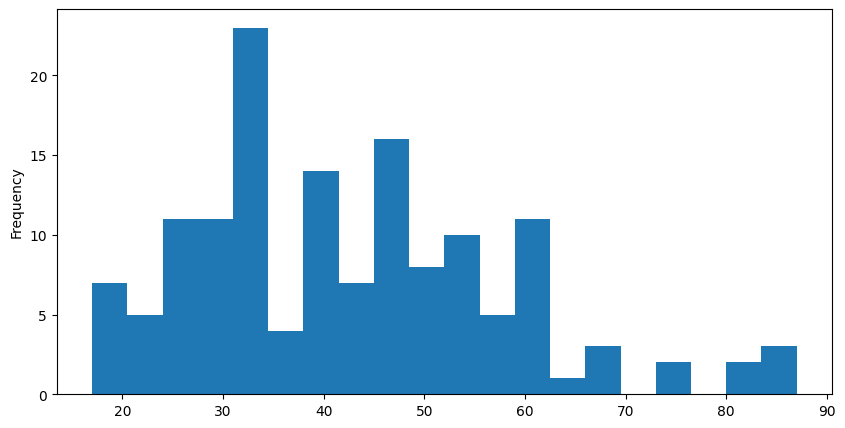

In [27]:
df['title_length'] = df['title'].str.len()
df['title_length'].plot(kind='hist', bins=20, figsize=(10,5))

### Articles per month

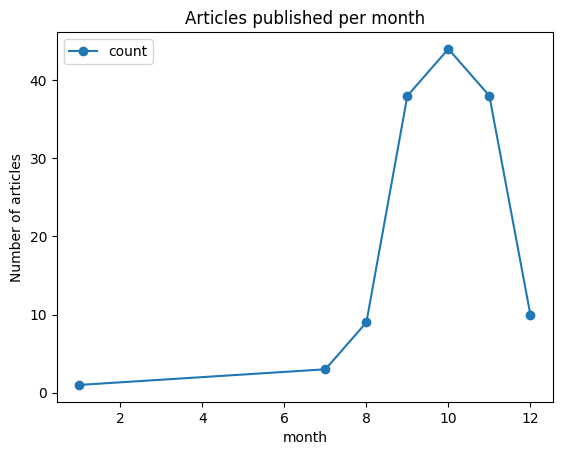

In [28]:
monthly = df.groupby('month').size().rename('count').reset_index()
monthly.plot(x='month', y='count', marker='o')
plt.title("Articles published per month")
plt.ylabel("Number of articles")
plt.show()

### Publishing trend by theme, monthwise

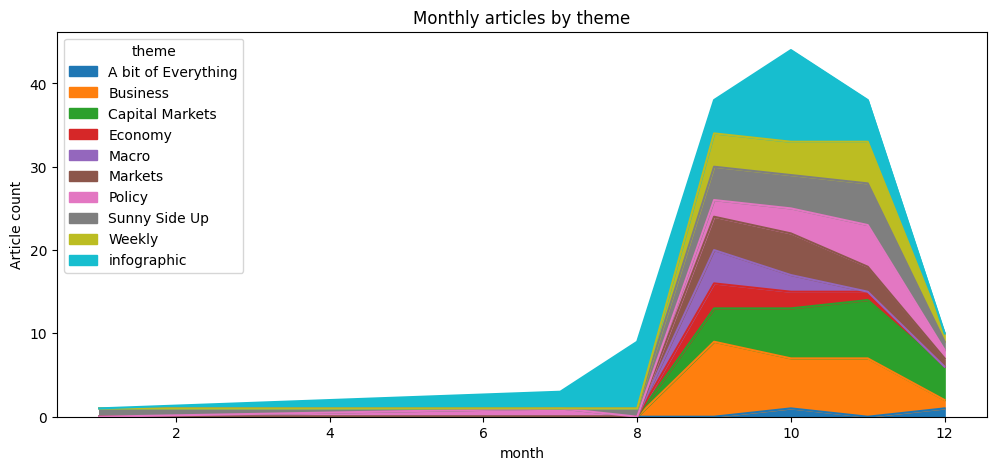

In [60]:
by_theme_month = df.groupby(['month','theme']).size().unstack(fill_value=0)
by_theme_month.plot.area(figsize=(12,5))
plt.title("Monthly articles by theme")
plt.ylabel("Article count")
plt.show()

### Weekday publishing pattern

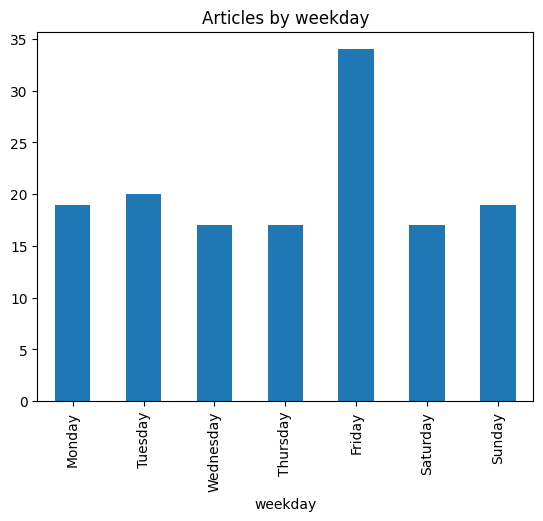

In [30]:
df['weekday'] = df['date'].dt.day_name()
df['weekday'].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
).plot(kind='bar')
plt.title("Articles by weekday")
plt.show()

### Word Count distribution

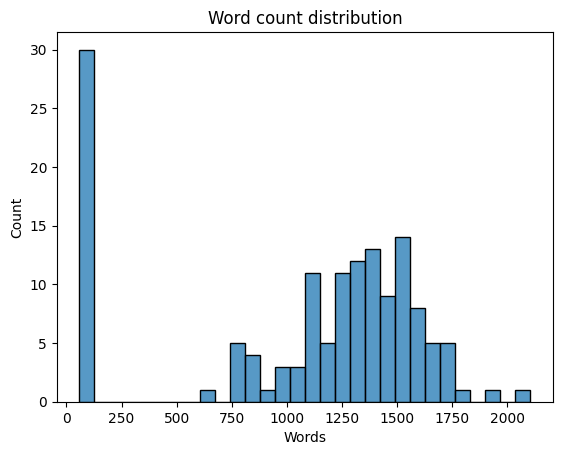

In [31]:
sns.histplot(df['word_count'].dropna(), bins=30)
plt.title("Word count distribution")
plt.xlabel("Words")
plt.show()

### Reading time by theme

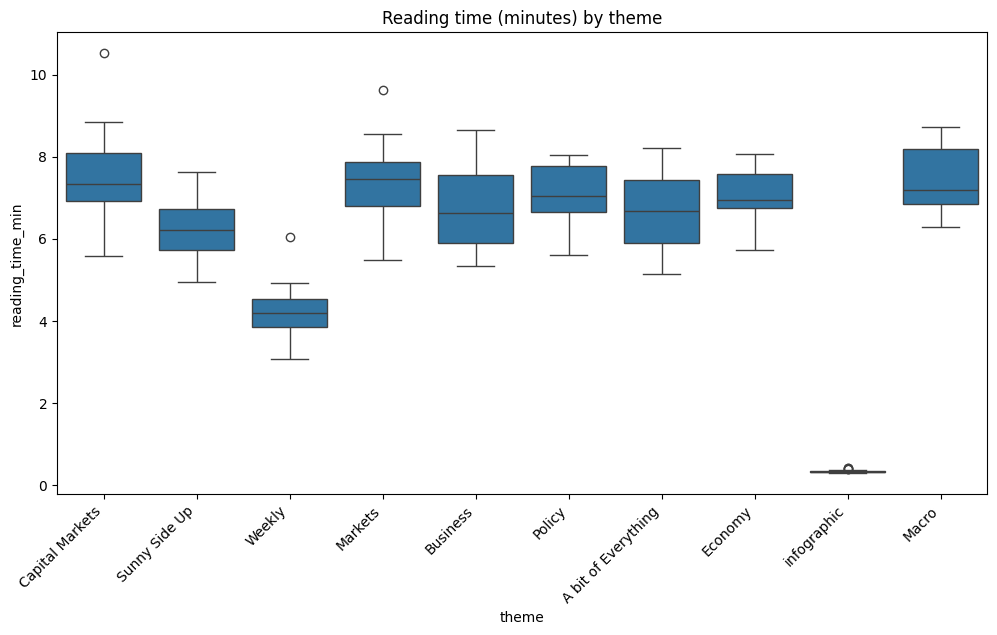

In [32]:
tmp = df[df['reading_time_min'].notna() & df['theme'].notna()]
plt.figure(figsize=(12,6))
sns.boxplot(x='theme', y='reading_time_min', data=tmp)
plt.xticks(rotation=45, ha='right')
plt.title("Reading time (minutes) by theme")
plt.show()

### Sentiment distribution

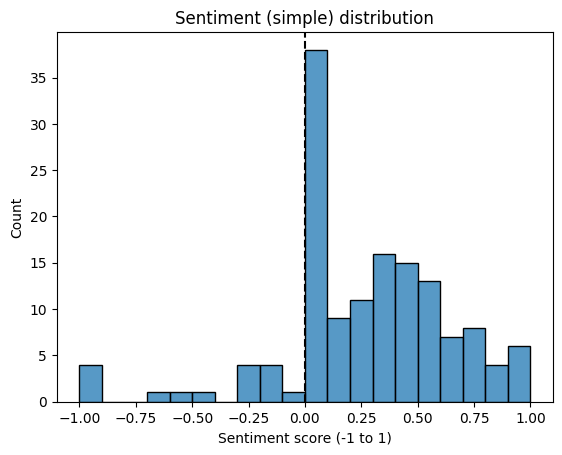

In [33]:
sns.histplot(df['sentiment_simple'].dropna(), bins=20)
plt.title("Sentiment (simple) distribution")
plt.xlabel("Sentiment score (-1 to 1)")
plt.axvline(0, color='k', linestyle='--')
plt.show()

### Sentiment over time

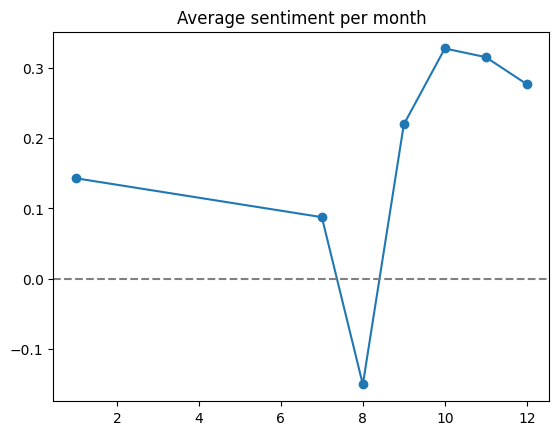

In [34]:
sent_month = df.dropna(subset=['date','sentiment_simple']).groupby('month')['sentiment_simple'].mean().reset_index()
plt.plot(sent_month['month'], sent_month['sentiment_simple'], marker='o')
plt.title("Average sentiment per month")
plt.axhline(0, color='gray', linestyle='--')
plt.show()

### Word Count vs sentiment 

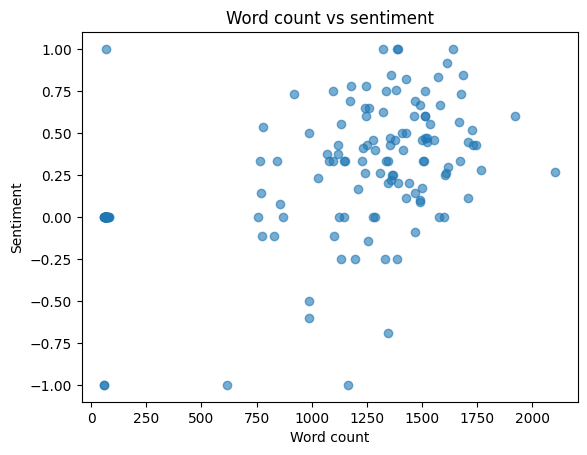

Pearson r: 0.466060563817845


In [37]:
plt.scatter(df['word_count'], df['sentiment_simple'], alpha=0.6)
plt.xlabel("Word count")
plt.ylabel("Sentiment")
plt.title("Word count vs sentiment")
plt.show()
print("Pearson r:", df[['word_count','sentiment_simple']].dropna().corr().iloc[0,1])

### Top Keywords

<>:2: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:2: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
/var/folders/xw/nxfdfyv90zb7rd21t5fxd6000000gn/T/ipykernel_62669/3263696657.py:2: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
  kw = df['top_keywords'].dropna().astype(str).str.split(',\s*').explode()


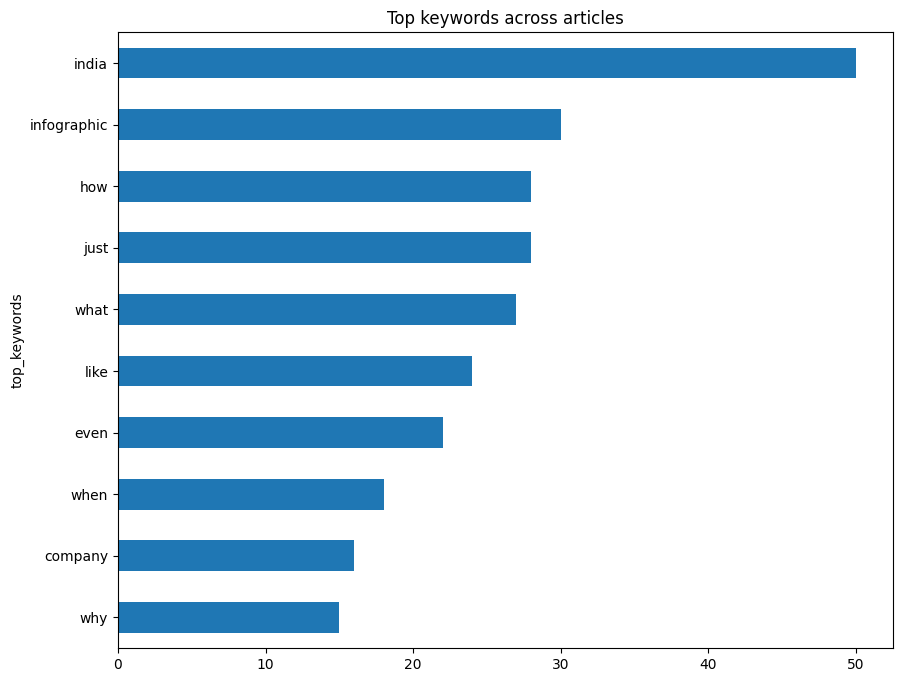

In [59]:
plt.figure(figsize=(10,8))
kw = df['top_keywords'].dropna().astype(str).str.split(',\s*').explode()
top_kw = kw.value_counts().head(10)
top_kw.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top keywords across articles")
plt.show()

### Top mentioned entities (companies/names)

<>:1: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:1: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
/var/folders/xw/nxfdfyv90zb7rd21t5fxd6000000gn/T/ipykernel_62669/2794583660.py:1: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
  ents = df['entities_simple'].dropna().astype(str).str.split(',\s*').explode()


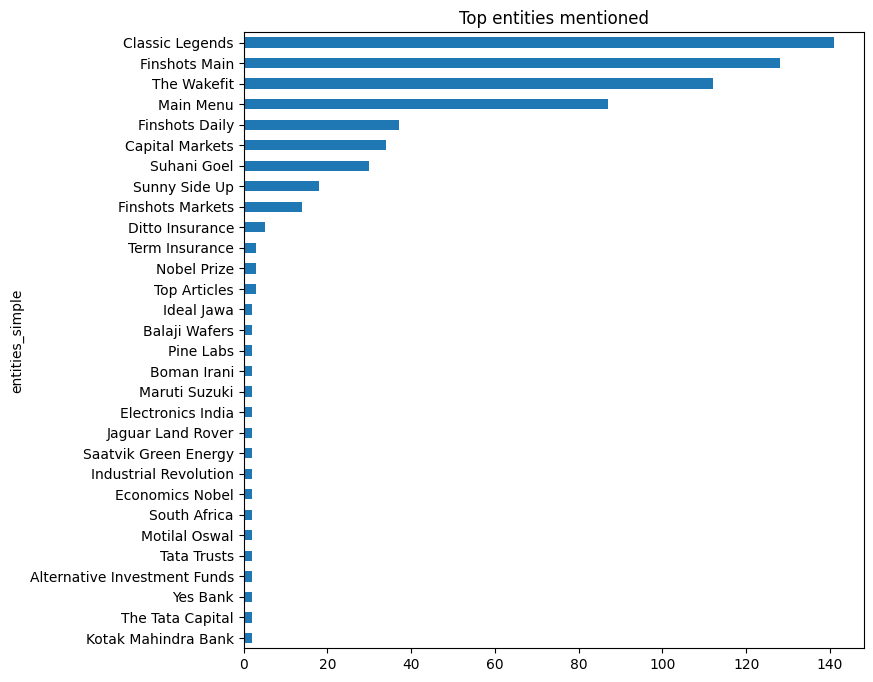

In [39]:
ents = df['entities_simple'].dropna().astype(str).str.split(',\s*').explode()
ents_counts = ents.value_counts().head(30)
ents_counts.plot(kind='barh', figsize=(8,8))
plt.gca().invert_yaxis()
plt.title("Top entities mentioned")
plt.show()

### Theme x Sentiment pivot table

In [40]:
pivot = df.groupby('theme')['sentiment_simple'].agg(['count','mean','median']).sort_values('mean', ascending=False)
pivot.head(20)

,count,mean,median
theme,,,
A bit of Everything,2,0.615500,0.6155
Economy,6,0.576833,0.6055
Capital Markets,21,0.455143,0.4550
Macro,6,0.417333,0.4420
Markets,13,0.406769,0.4120
Sunny Side Up,16,0.383563,0.3665
Business,23,0.270043,0.3330
Policy,12,0.264167,0.3190
Weekly,14,0.000143,0.0385


### Top 10 longest articles

In [41]:
print("Longest articles")
display(df.nlargest(10, 'word_count')[['date','theme','title','word_count']])

Longest articles


,date,theme,title,word_count
130,2025-09-09,Capital Markets,The Urban Company IPO explained,2104
76,2025-10-17,Markets,Should you just 'index and chill'?,1924
4,2025-12-02,Capital Markets,DroneAcharya Aerial Innovations has landed its...,1768
89,2025-09-23,Macro,"The $100,000 H1-B visa shock",1746
5,2025-12-05,Business,The economics of Pantone and its colours,1731
59,2025-11-04,Capital Markets,The Groww IPO explained,1726
70,2025-10-24,Markets,RBI breaks down the SME IPO hype,1711
127,2025-09-12,Markets,What’s driving the Prime Focus re-run?,1707
90,2025-10-09,Macro,"Gold is cool, but what about Platinum?",1687
32,2025-11-11,Capital Markets,The PhysicsWallah IPO explained,1677


### Top 10 shortest articles

In [43]:
print("Shortest articles")
display(df.nsmallest(10, 'word_count')[['date', 'theme', 'title', 'word_count']])

Shortest articles


,date,theme,title,word_count
34,2025-11-08,infographic,Adani Group Ownership,59
113,2025-08-20,infographic,How Emami Makes Money,59
114,2025-08-21,infographic,How ITC Makes Money,59
36,2025-11-06,infographic,Alcohol Taxes Across Indian States,60
42,2025-10-20,infographic,State-Wise Investor Penetration,60
47,2025-10-10,infographic,Top 10 Richest NRIs,61
48,2025-10-07,infographic,Highest Earning CEOs in India,62
112,2025-09-07,infographic,GST 2.0 Rate Cuts,62
44,2025-10-22,infographic,Top 10 Richest Indian Families,63
118,2025-08-20,infographic,Paint Market Share in India,63


### Average reading time

In [45]:
average_reading_time = round(df['reading_time_min'].mean(), 2)
average_reading_time

np.float64(5.34)

### Average Flesch reading score

In [47]:
average_flesch_score = round(df['flesch_simple'].mean(), 2)
average_flesch_score

np.float64(61.86)

### Average word count

In [48]:
average_word_count = round(df['word_count'].mean(), 2)
average_word_count

np.float64(1067.54)

### Average sentiment score

In [49]:
df.head()

,url,date,theme,title,content_simple,word_count,reading_time_min,flesch_simple,sentiment_simple,top_keywords,entities_simple,year,month,day,weekday,title_length
0,https://finshots.in/archive/the-wakefit-innova...,2025-12-08,Capital Markets,The Wakefit IPO explained,8 December 2025 • Capital Markets The Wakefit ...,1501,7.50,60.23,0.455,"wakefit, crore, company, stores, ipo, fy25, re...","The Wakefit, Wakefit Innovations, Capital Mark...",2025,12,8,Monday,25
1,https://finshots.in/archive/classic-legends-wi...,2025-12-07,Sunny Side Up,"🍳Classic Legends win back Yezdi, and more...",7 December 2025 • Sunny Side Up 🍳Classic Legen...,1245,6.22,58.59,0.778,"yezdi, like, into, trademark, what, name, comp...","Classic Legends, Sunny Side Up, Ideal Jawa, Bo...",2025,12,7,Sunday,44
2,https://finshots.in/archive/rupees-slide-the-m...,2025-12-06,Weekly,"Rupee's slide, the Meesho IPO, the Airbus scar...","6 December 2025 • Weekly Rupee's slide, the Me...",1208,6.04,61.42,0.167,"how, week, out, weekly, finshots, here, quiz, ipo","Aerial Innovations, The Airbus, Finshots Weekl...",2025,12,6,Saturday,58
3,https://finshots.in/markets/is-the-rupee-too-w...,2025-12-05,Markets,Is the rupee too weak or the dollar too strong,5 December 2025 • Markets Is the rupee too wea...,1361,6.80,62.37,0.217,"rupee, india, currency, dollar, economy, infla...","But India, Classic Legends, Finshots Main, The...",2025,12,5,Friday,46
4,https://finshots.in/archive/droneacharya-aeria...,2025-12-02,Capital Markets,DroneAcharya Aerial Innovations has landed its...,2 December 2025 • Capital Markets DroneAcharya...,1768,8.84,55.47,0.280,"investors, ipo, company, droneacharya, when, c...","Aerial Innovations, Capital Markets, Classic L...",2025,12,2,Tuesday,69


In [51]:
average_sentiment_score = round(df['sentiment_simple'].mean(), 2)
average_sentiment_score

np.float64(0.26)

### Word Count Distribution

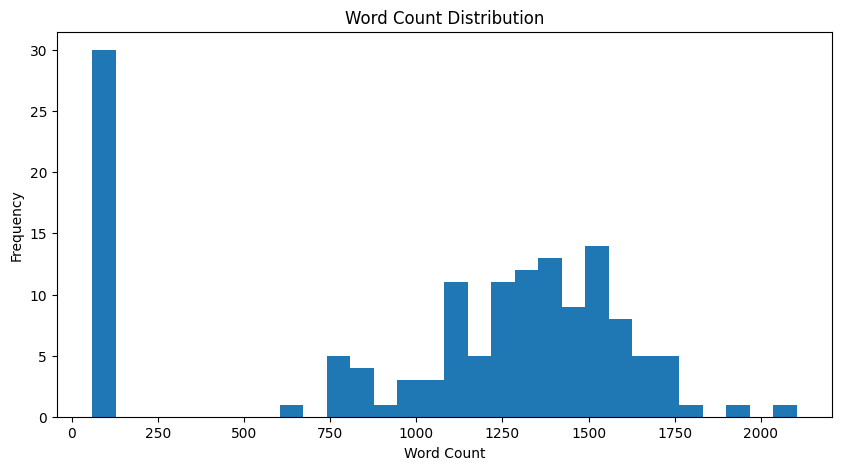

In [52]:
plt.figure(figsize=(10, 5))
plt.hist(df["word_count"].dropna(), bins=30)
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

### Reading time Distribution

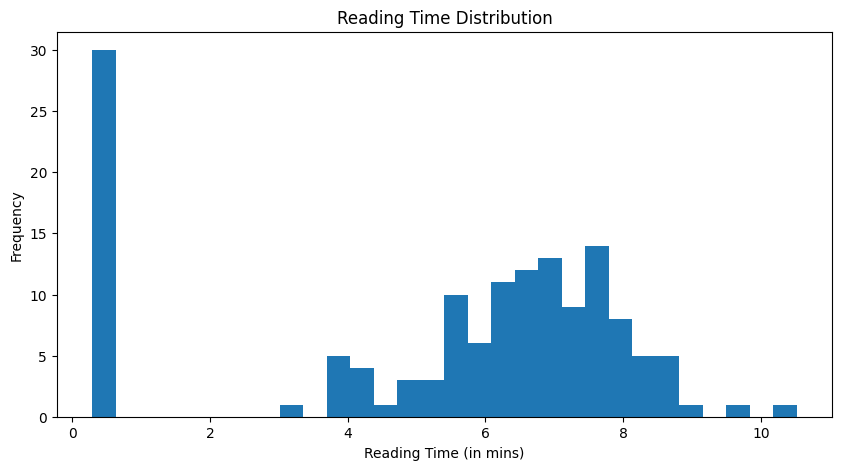

In [53]:
plt.figure(figsize=(10, 5))
plt.hist(df["reading_time_min"].dropna(), bins=30)
plt.title("Reading Time Distribution")
plt.xlabel("Reading Time (in mins)")
plt.ylabel("Frequency")
plt.show()

### Distribution of sentiment score

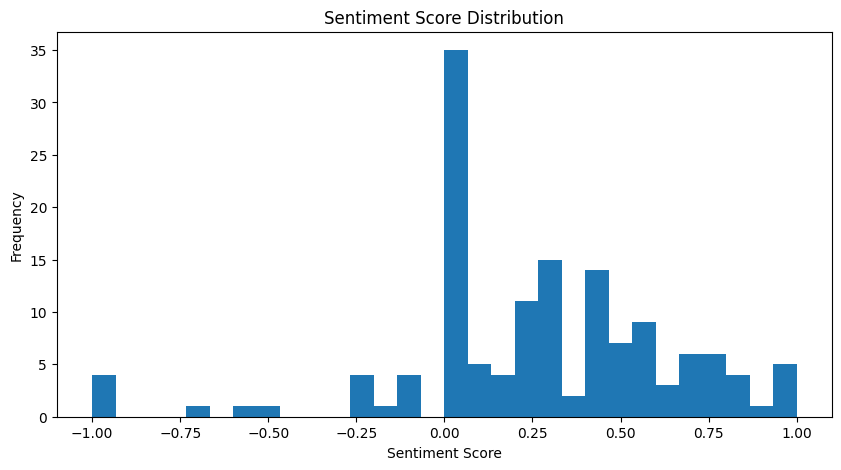

In [61]:
plt.figure(figsize=(10, 5))
plt.hist(df["sentiment_simple"].dropna(), bins=30)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

### Monthly Sentiment Trend

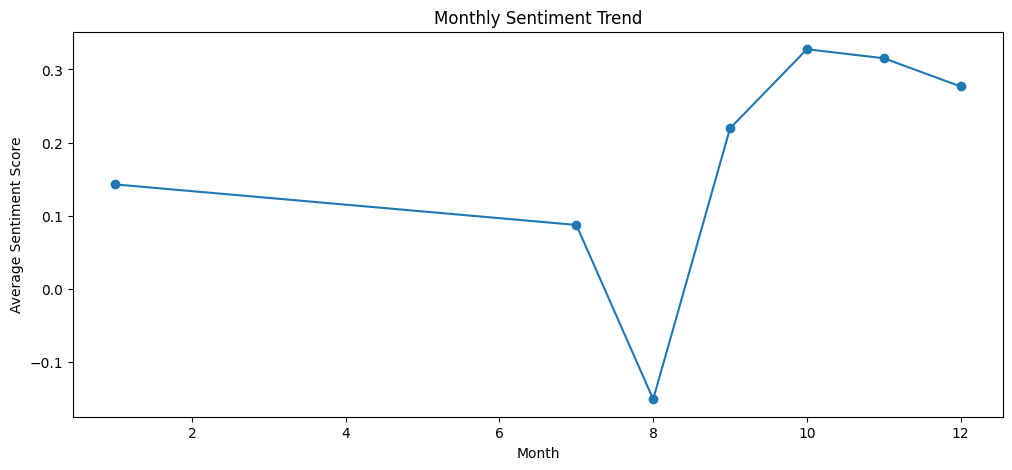

In [63]:
sent_month = (
    df.dropna(subset=['sentiment_simple'])        
      .groupby('month')['sentiment_simple']
      .mean()
      .reset_index()
)
plt.figure(figsize=(12,5))
plt.plot(sent_month['month'], sent_month['sentiment_simple'], marker='o')
plt.title("Monthly Sentiment Trend")
plt.xlabel("Month")
plt.ylabel("Average Sentiment Score")
plt.show()

### Word Count by theme

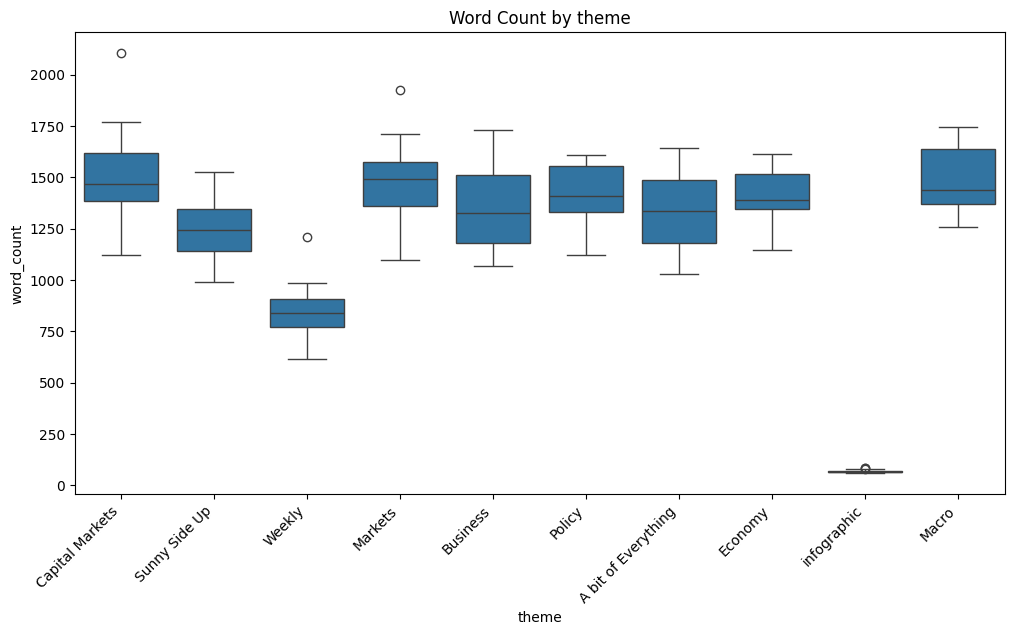

In [64]:
tmp = df[df['word_count'].notna() & df['theme'].notna()]
plt.figure(figsize=(12,6))
sns.boxplot(x='theme', y='word_count', data=tmp)
plt.xticks(rotation=45, ha='right')
plt.title("Word Count by theme")
plt.show()

### Sentiment by theme

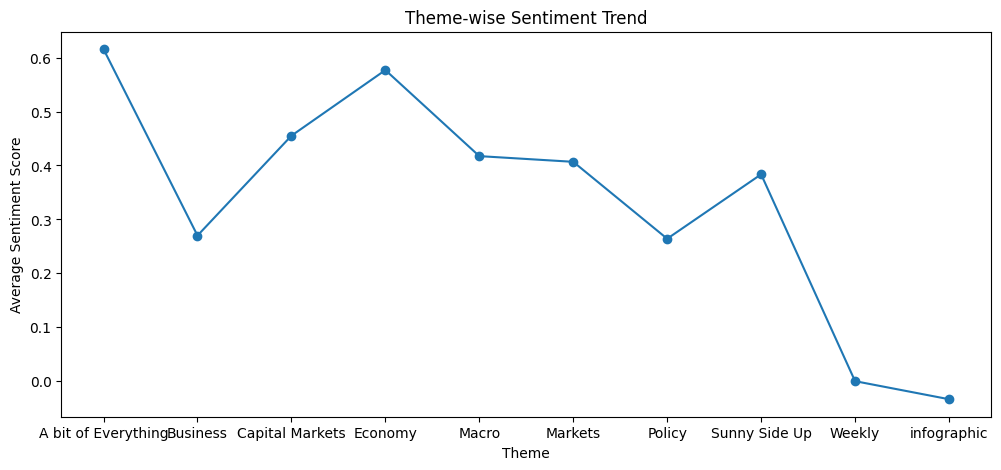

In [65]:
sent_theme = (
    df.dropna(subset=['sentiment_simple'])        
      .groupby('theme')['sentiment_simple']
      .mean()
      .reset_index()
)
plt.figure(figsize=(12,5))
plt.plot(sent_theme['theme'], sent_theme['sentiment_simple'], marker='o')
plt.title("Theme-wise Sentiment Trend")
plt.xlabel("Theme")
plt.ylabel("Average Sentiment Score")
plt.show()

### Flesch Reading Score distribution

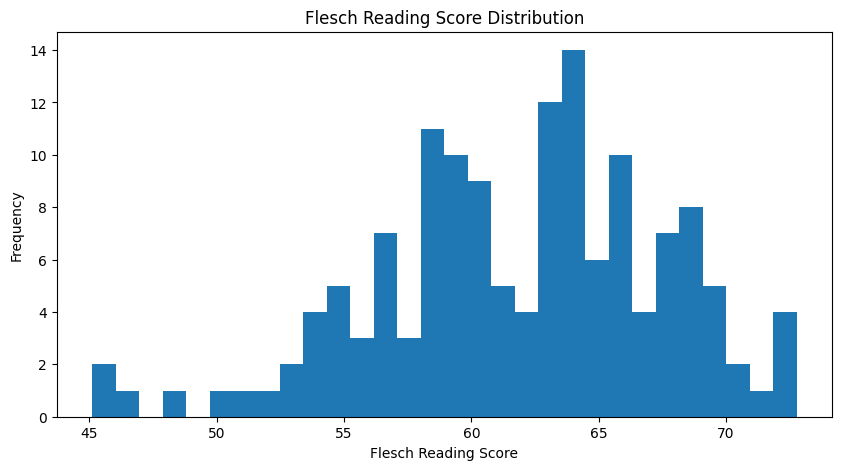

In [67]:
plt.figure(figsize=(10, 5))
plt.hist(df["flesch_simple"].dropna(), bins=30)
plt.title("Flesch Reading Score Distribution")
plt.xlabel("Flesch Reading Score")
plt.ylabel("Frequency")
plt.show()